In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('./data/pima-indians-diabetes.csv',
                 names = ['pregnant','plasma','pressure','thickness','insulin','BMI','pedigree',
                          'age','class'])

In [9]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).count())

    pregnant  class
0          0    111
1          1    135
2          2    103
3          3     75
4          4     68
5          5     57
6          6     50
7          7     45
8          8     38
9          9     28
10        10     24
11        11     11
12        12      9
13        13     10
14        14      2
15        15      1
16        17      1


In [13]:
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant',ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


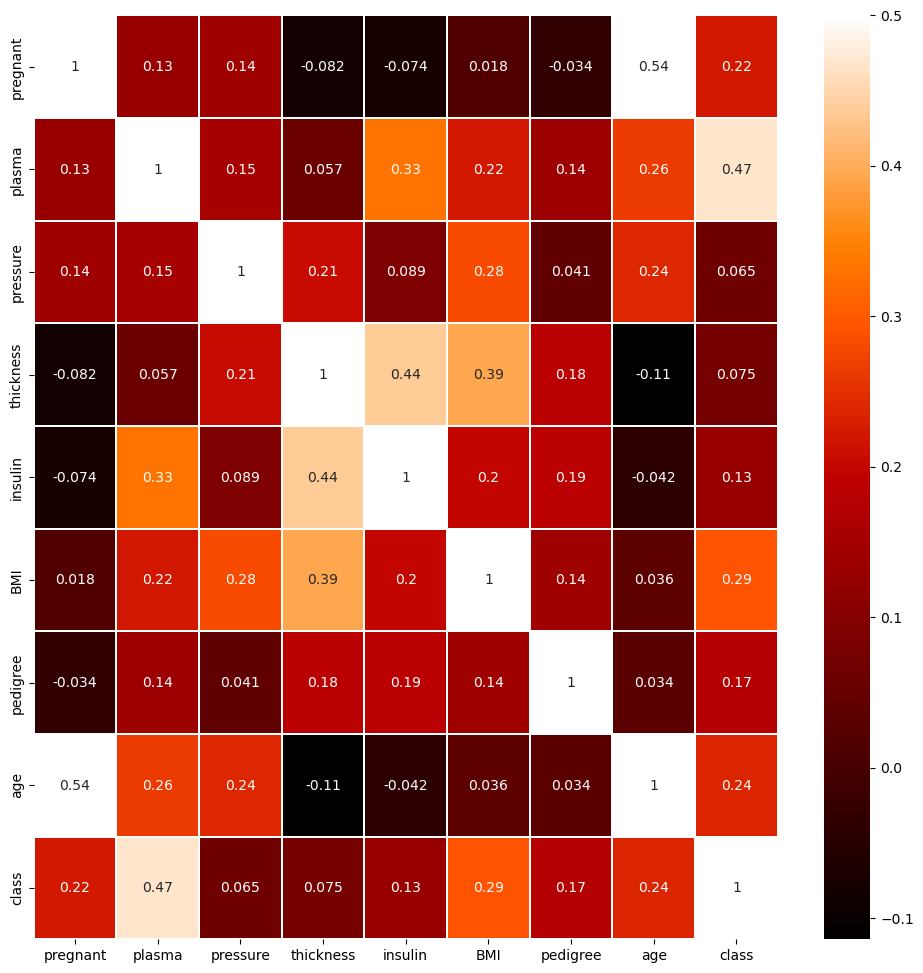

In [15]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))



sns.heatmap(df.corr(),linewidths=0.1 ,vmax=0.5,cmap=colormap,linecolor='white',annot=True)
plt.show()

/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


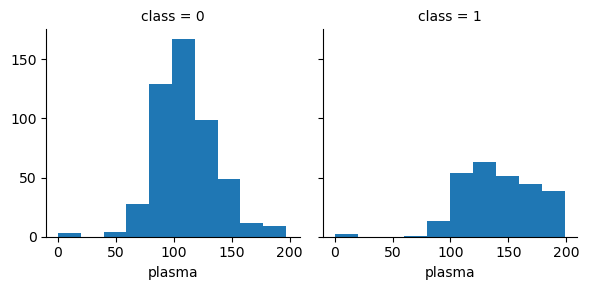

In [16]:
grid = sns.FacetGrid(df,col='class')
grid.map(plt.hist,'plasma',bins=10)
plt.show()

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)


# 수술 데이터 환자 데이터 불러오기
Data_set = np.loadtxt('./data/pima-indians-diabetes.csv', delimiter=',')

In [28]:
Data_set.shape

(768, 9)

In [34]:
X = Data_set[:, 0:8] 
y = Data_set[:, 8] 



model = Sequential()
model.add(Dense(12,input_dim=8, activation = 'relu'))
model.add(Dense(8,activation='relu')) # input_dim -> 입력레이어 , relu: 입력값 x가 0보다 크면 그 값을 그대로 출력하고, 0 이하이면 0을 출력
model.add(Dense(1,activation='sigmoid')) # 만약에 softmax라면 다중분류


# 딥러닝 학습(실행)
                    # 바이너리 = 이진분류	    최적화 알고리즘         성능측정지표
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy']) # loss = 'categorical_crossentorypy' -> 다중분류

model.fit(X,y,epochs=200,batch_size=10) # epochs=100 -> 전체 모델 반복학습 횟수 , batch_size -> 10개씩 끊어서 데이터에 넣음


print('\n Accuracy: {0:.4f}'.format(model.evaluate(X,y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 659us/step - loss: 4.8944 - accuracy: 0.6289
Epoch 2/200
77/77 [==============================] - 0s 496us/step - loss: 1.2376 - accuracy: 0.5716
Epoch 3/200
77/77 [==============================] - 0s 475us/step - loss: 0.8118 - accuracy: 0.5859
Epoch 4/200
77/77 [==============================] - 0s 445us/step - loss: 0.7658 - accuracy: 0.6068
Epoch 5/200
77/77 [==============================] - 0s 442us/step - loss: 0.7460 - accuracy: 0.6068
Epoch 6/200
77/77 [==============================] - 0s 842us/step - loss: 0.7179 - accuracy: 0.6315
Epoch 7/200
77/77 [==============================] - 0s 836us/step - loss: 0.6900 - accuracy: 0.6432
Epoch 8/200
77/77 [==============================] - 0s 894us/step - loss: 0.6796 - accuracy: 0.6419
Epoch 9/200
77/77 [==============================] - 0s 797us/step - loss: 0.6637 - accuracy: 0.6497
Epoch 10/200
77/77 [==============================] - 0s 584us/step - loss: 0.6604 - accura